<a href="https://colab.research.google.com/github/aniketmodi-work/ML-NMIMS/blob/master/Lab_Assigments/ML_Lab_Exp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experiment 6

**Aim:** Classification using Neural network models

**Objectives:**
* Perform classification on bitcoin 2011 dataset
* Select correct architecture for +75% accuracy on cross validation and test set for bitcoin 2011 dataset - 60%-20%-20% (Train-Crossval-Test split)
* Plot accuracy vs validation acc and loss vs validation loss during epochs


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget -O 2011gcn.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
!wget -O tx2011partvertices_new.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
!wget -O tx2011partvertices.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices.csv


--2020-08-31 02:43:09--  https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12563086 (12M) [text/plain]
Saving to: ‘2011gcn.csv’

2011gcn.csv         100%[===================>]  11.98M  26.1MB/s    in 0.5s    

2020-08-31 02:43:10 (26.1 MB/s) - ‘2011gcn.csv’ saved [12563086/12563086]

--2020-08-31 02:43:10--  https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12501458 (12M) [text/plain]

In [3]:
data1 = pd.read_csv('2011gcn.csv')
data2 = pd.read_csv('tx2011partvertices_new.csv')
data3 = pd.read_csv('tx2011partvertices.csv')

In [4]:
print('Data 1 Shape: ', data1.shape)
print('Data 2 Shape: ', data2.shape)
print('Data 3 Shape: ', data3.shape)

Data 1 Shape:  (96498, 17)
Data 2 Shape:  (96498, 20)
Data 3 Shape:  (96498, 2)


In [5]:
data1.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0.0,4.811244e+07,0.0,0.0,5.298934e+07,0.0,5.215435e+07,0.0,0.0,4.293262e+05,3.994267e+07,6.251989e+07,0.0,0.0,2.670458e+07,8.313858e+07
1,1,0.0,3.477977e+05,0.0,0.0,3.777575e+05,0.0,3.757520e+05,0.0,0.0,6.889133e+03,3.001618e+05,4.527358e+05,0.0,0.0,1.915057e+05,6.009039e+05
2,2,0.0,6.455196e+07,0.0,0.0,7.110790e+07,0.0,6.997804e+07,0.0,0.0,5.670157e+05,5.356332e+07,8.388026e+07,0.0,0.0,3.583296e+07,1.115463e+08
3,3,0.0,2.009876e+08,0.0,0.0,2.214679e+08,0.0,2.174101e+08,0.0,0.0,1.342720e+06,1.665389e+08,2.614420e+08,0.0,0.0,1.116514e+08,3.472892e+08
4,4,0.0,2.384675e+05,0.0,0.0,2.597246e+05,0.0,2.577884e+05,0.0,0.0,4.202993e+03,2.042845e+05,3.103489e+05,0.0,0.0,1.315073e+05,4.120424e+05


In [6]:
data1.rename(columns={'Unnamed: 0':'index'}, inplace=True)
data1['index'] = data1['index'] + 1
data1.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0.0,4.811244e+07,0.0,0.0,5.298934e+07,0.0,5.215435e+07,0.0,0.0,4.293262e+05,3.994267e+07,6.251989e+07,0.0,0.0,2.670458e+07,8.313858e+07
1,2,0.0,3.477977e+05,0.0,0.0,3.777575e+05,0.0,3.757520e+05,0.0,0.0,6.889133e+03,3.001618e+05,4.527358e+05,0.0,0.0,1.915057e+05,6.009039e+05
2,3,0.0,6.455196e+07,0.0,0.0,7.110790e+07,0.0,6.997804e+07,0.0,0.0,5.670157e+05,5.356332e+07,8.388026e+07,0.0,0.0,3.583296e+07,1.115463e+08
3,4,0.0,2.009876e+08,0.0,0.0,2.214679e+08,0.0,2.174101e+08,0.0,0.0,1.342720e+06,1.665389e+08,2.614420e+08,0.0,0.0,1.116514e+08,3.472892e+08
4,5,0.0,2.384675e+05,0.0,0.0,2.597246e+05,0.0,2.577884e+05,0.0,0.0,4.202993e+03,2.042845e+05,3.103489e+05,0.0,0.0,1.315073e+05,4.120424e+05


In [7]:
data2.rename(columns={'Unnamed: 0':'index'}, inplace=True)
data2.head()

,index,txsize,txvirtualsize,txinputs_count,txoutputs_count,txinput_val,txoutput_val,txfee,Min_received,Max_received,Avg_received,Total_received,Stdev_received,Var_received,Min_sent,Max_sent,Avg_sent,Total_sent,Stdev_sent,Var_sent
0,1,7369,7369,5,190,215000000.0,214600000.0,400000,0.0005,1.0000,0.011295,2.1460,0.081163,0.006587,0.0005,1.6700,0.4300,2.1500,0.703445,0.494835
1,2,293,293,1,3,4400000.0,4350000.0,50000,0.0010,0.0415,0.014500,0.0435,0.023383,0.000547,0.0440,0.0440,0.0440,0.0440,0.000000,0.000000
2,3,11139,11139,1,322,125000000.0,124400000.0,600000,0.0010,0.4460,0.003863,1.2440,0.024941,0.000622,1.2500,1.2500,1.2500,1.2500,0.000000,0.000000
3,4,495,495,1,9,27450000.0,27400000.0,50000,0.0010,0.2660,0.030444,0.2740,0.088333,0.007803,0.2745,0.2745,0.2745,0.2745,0.000000,0.000000
4,5,462,462,1,8,3000000.0,2950000.0,50000,0.0010,0.0225,0.003687,0.0295,0.007601,0.000058,0.0300,0.0300,0.0300,0.0300,0.000000,0.000000


In [8]:
data3.rename(columns={'Unnamed: 0':'index'}, inplace=True)
data3.head()

,index,label
0,1,unclassified
1,2,donations
2,3,unclassified
3,4,donations
4,5,donations


In [9]:
print(data1.info())
print(data2.info())
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96498 entries, 0 to 96497
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   96498 non-null  int64  
 1   0       96498 non-null  float64
 2   1       96498 non-null  float64
 3   2       96498 non-null  float64
 4   3       96498 non-null  float64
 5   4       96498 non-null  float64
 6   5       96498 non-null  float64
 7   6       96498 non-null  float64
 8   7       96498 non-null  float64
 9   8       96498 non-null  float64
 10  9       96498 non-null  float64
 11  10      96498 non-null  float64
 12  11      96498 non-null  float64
 13  12      96498 non-null  float64
 14  13      96498 non-null  float64
 15  14      96498 non-null  float64
 16  15      96498 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 12.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96498 entries, 0 to 96497
Data columns (total 20 columns):
 #   Column           

In [10]:
X = pd.merge(data3, data1, on='index', how='inner')
x = X.iloc[:,2:18]
Y = X['label']

In [11]:
from sklearn import preprocessing
y = pd.get_dummies(Y)

In [12]:
print(x.shape)
print(y.shape)

(96498, 16)
(96498, 6)


In [13]:
from sklearn.model_selection import train_test_split

seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=seed)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size= 0.5, random_state=seed)

In [14]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(57898, 16)
(19300, 16)
(19300, 16)
(57898, 6)
(19300, 6)
(19300, 6)


In [15]:

from keras import models
from keras import layers

In [16]:
nn = models.Sequential()

nn.add(layers.Dense(512, activation = "relu", input_shape = (16,)))
nn.add(layers.Dense(256, activation = "relu"))
nn.add(layers.Dense(128, activation = "tanh"))
nn.add(layers.Dense(6, activation = "softmax"))

nn.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])

nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               8704      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
Total params: 173,702
Trainable params: 173,702
Non-trainable params: 0
_________________________________________________________________


In [17]:
hist = nn.fit(x_train, y_train, epochs=100, batch_size=256, validation_data = (x_val, y_val))


Epoch 1/100
227/227 [==============================] - 3s 12ms/step - loss: 0.6366 - accuracy: 0.8227 - val_loss: 0.6345 - val_accuracy: 0.8347
Epoch 2/100
227/227 [==============================] - 2s 11ms/step - loss: 0.6372 - accuracy: 0.8331 - val_loss: 0.6252 - val_accuracy: 0.8347
Epoch 3/100
227/227 [==============================] - 2s 10ms/step - loss: 0.6339 - accuracy: 0.8331 - val_loss: 0.6103 - val_accuracy: 0.8347
Epoch 4/100
227/227 [==============================] - 2s 11ms/step - loss: 0.6093 - accuracy: 0.8331 - val_loss: 0.6389 - val_accuracy: 0.8347
Epoch 5/100
227/227 [==============================] - 2s 11ms/step - loss: 0.6305 - accuracy: 0.8331 - val_loss: 0.6285 - val_accuracy: 0.8347
Epoch 6/100
227/227 [==============================] - 2s 11ms/step - loss: 0.6168 - accuracy: 0.8331 - val_loss: 0.6059 - val_accuracy: 0.8347
Epoch 7/100
227/227 [==============================] - 2s 10ms/step - loss: 0.6264 - accuracy: 0.8331 - val_loss: 0.6243 - val_accuracy:

In [18]:
train_loss, train_accuracy = nn.evaluate(x_train, y_train)
val_loss, val_accuracy = nn.evaluate(x_val, y_val)
test_loss, test_accuracy = nn.evaluate(x_test, y_test)


604/604 [==============================] - 1s 1ms/step - loss: 0.5824 - accuracy: 0.8549


In [19]:
print('Training Accuracy : ', train_accuracy*100, "%")
print('Validate Accuracy : ', val_accuracy*100, "%")
print('Test Accuracy : ', test_accuracy*100, "%")

Training Accuracy :  85.46236753463745 %
Validate Accuracy :  85.59585213661194 %
Test Accuracy :  85.48704385757446 %


In [20]:
loss_train, loss_val, epochs = hist.history['loss'], hist.history['val_loss'], range(1,101)

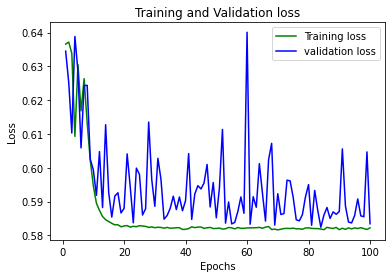

In [21]:
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
loss_train, loss_val, epochs = hist.history['accuracy'], hist.history['val_accuracy'], range(1,101)

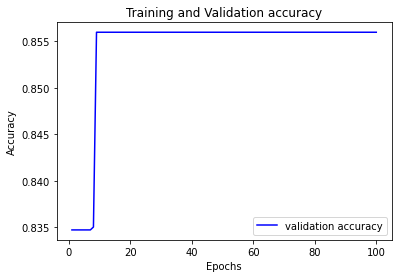

In [23]:
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()